<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%83%9D%EC%84%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[내가 만든 데이터셋]
통계를 사용하여 분석할 가치가 있는 분석용 데이터셋을 만들기.

1. 내가 만든 데이터 셋을 csv파일로 저장
2. 저장 후 불러내서 결측치확인, 시각화 => 데이터가 어떤 특징을 가지는지 살펴보기
3. 중요한 변수는 정규분포, 이상치 줄이고, 결측치 넣어주고
(가격, 구매수량에 10개 결측치 반영 가격, 구매수량, 총 구매 금액 분포를 정규분초에 근사하도록 수정)

4. 고객 기준 데이터로 만들기.

1. 결측치확인, 시각화 => 데이터가 어떤 특징을 가지는지 살펴보기.
2. 중요한 변수는 정규분포에 근사하도록 수정하기.
3. 이상치 줄이기.
4. 가격, 구매수량에 10개 결측치 반영하기.

In [1]:
import pandas as pd

# 데이터 불러오기
combined_data = pd.read_csv('/content/combined_data.csv')
customer_data = pd.read_csv('/content/customer_data.csv')
transaction_data = pd.read_csv('/content/transaction_data.csv')

# 열 이름 확인
print("Combined Data Columns:", combined_data.columns)
print("Customer Data Columns:", customer_data.columns)
print("Transaction Data Columns:", transaction_data.columns)


Combined Data Columns: Index(['no', 'day', 'date', 'product_20', 'product_21', 'price_20', 'price_21',
       'quantity_20', 'quantity_21', 'time_20', 'time_21'],
      dtype='object')
Customer Data Columns: Index(['id', 'gender', 'age', 'region'], dtype='object')
Transaction Data Columns: Index(['no', 'day', 'date', 'product_20', 'product_21', 'price_20', 'price_21',
       'quantity_20', 'quantity_21', 'time_20', 'time_21'],
      dtype='object')


After adding missing values:
             Missing Count  Missing Percent
price_20                10              0.1
price_21                10              0.1
quantity_20             10              0.1
quantity_21             10              0.1


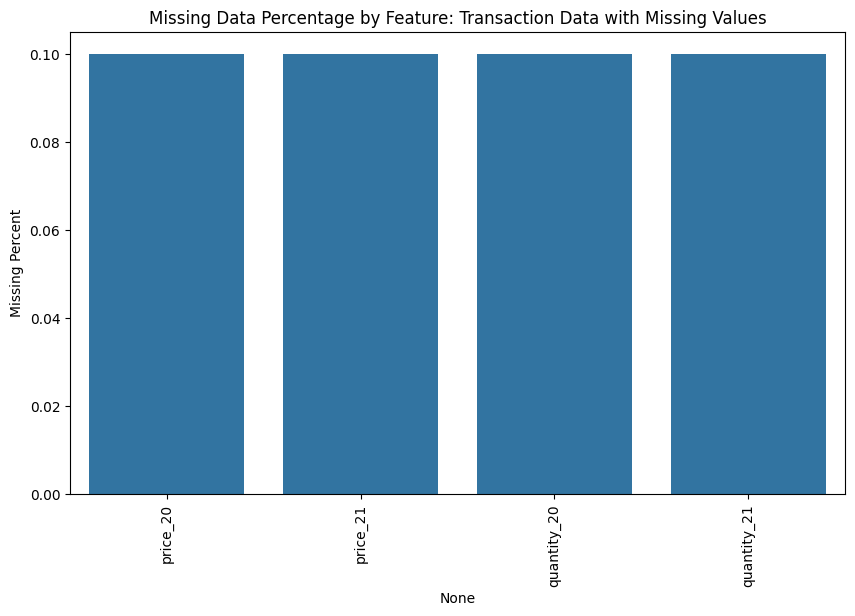

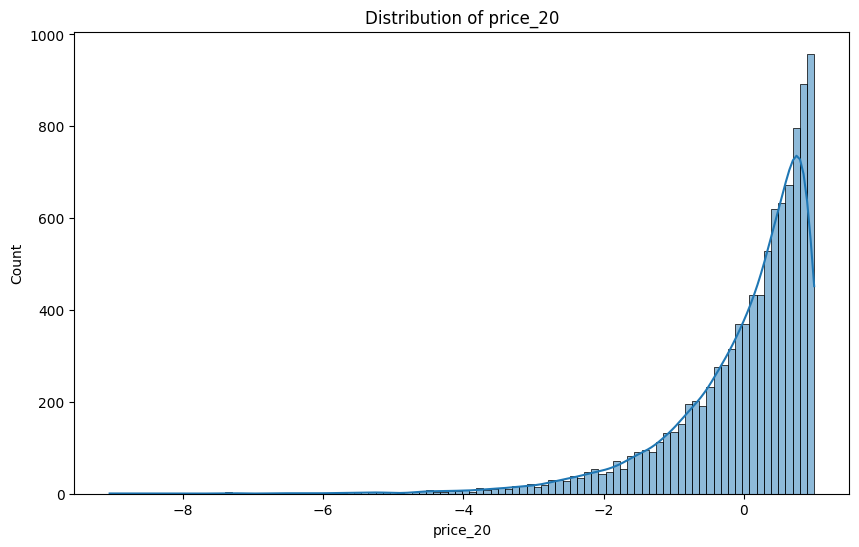

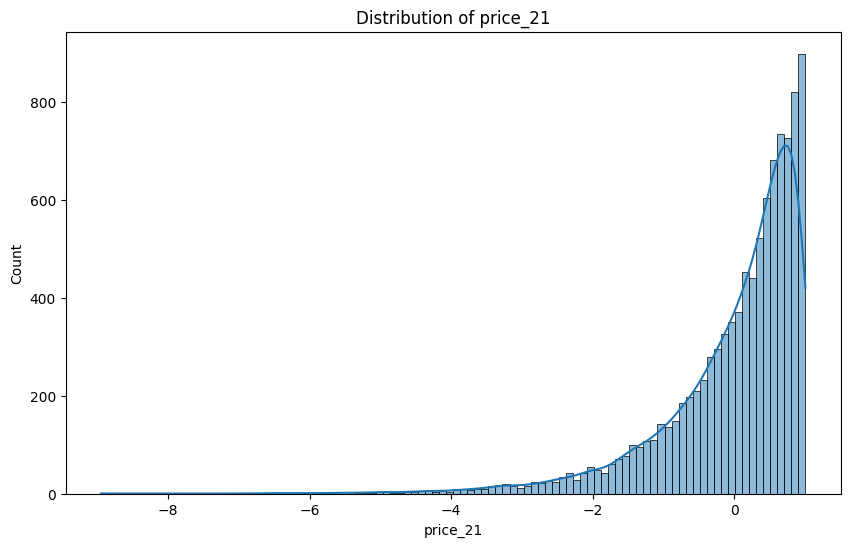

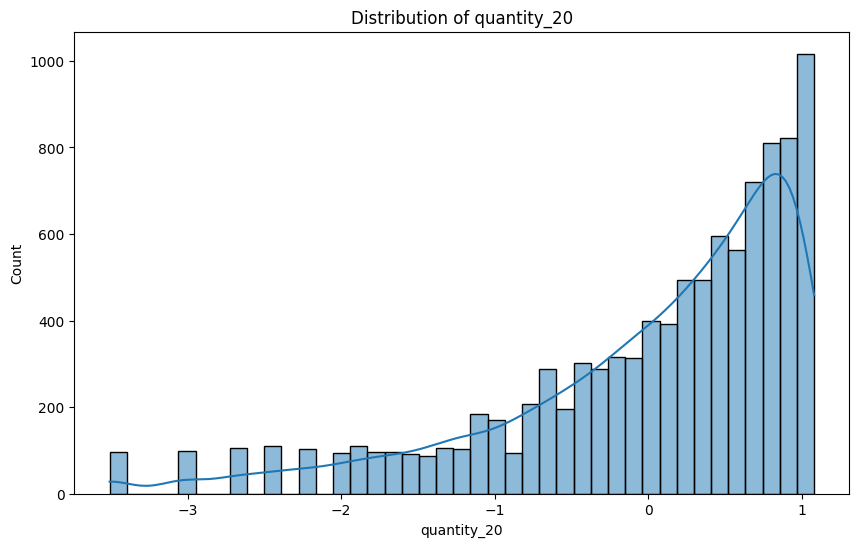

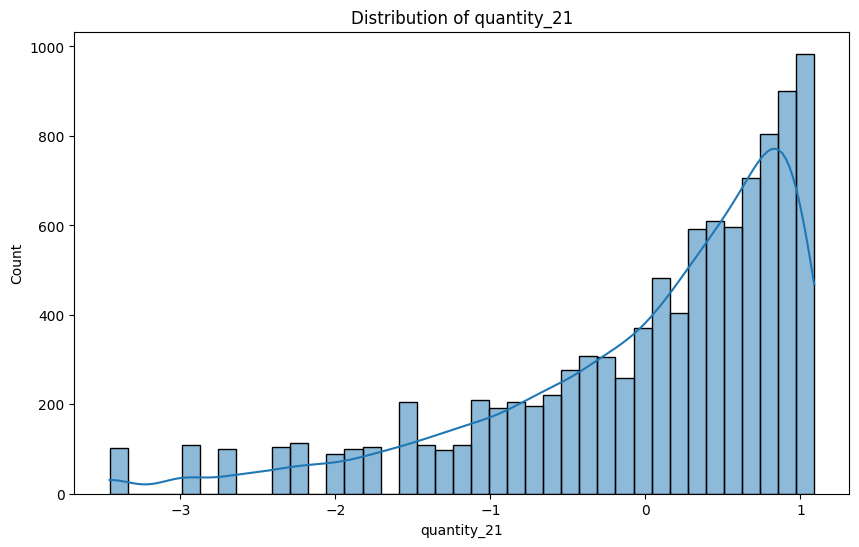

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 불러오기
combined_data = pd.read_csv('/content/combined_data.csv')
customer_data = pd.read_csv('/content/customer_data.csv')
transaction_data = pd.read_csv('/content/transaction_data.csv')

# 결측치 확인 함수
def missing_data_analysis(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing_percent = missing / len(df) * 100
    missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Percent': missing_percent})
    return missing_df

# 결측치 시각화 함수
def plot_missing_data(df, title):
    missing_df = missing_data_analysis(df)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df['Missing Percent'])
    plt.xticks(rotation=90)
    plt.title(f'Missing Data Percentage by Feature: {title}')
    plt.show()

# 이상치 줄이는 함수 (IQR을 활용하여 이상치 제거)
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# 결측치 처리 함수(평균으로 대체)
def fill_missing_values(df, columns):
    for column in columns:
        df[column].fillna(df[column].mean(), inplace=True)

# 정규분포에 근사하도록 수정하는 함수
def normalize_distribution(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column] - df[column].min() + 1)
        df[column] = (df[column] - df[column].mean()) / df[column].std()

# 결과 시각화 함수
def plot_distribution(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# 가격과 구매수량 관련 열 이름
important_columns = ['price_20', 'price_21', 'quantity_20', 'quantity_21']

# 가격과 구매수량에 10개 결측치 추가
np.random.seed(42)
missing_indices_price_20 = np.random.choice(transaction_data.index, 10, replace=False)
missing_indices_price_21 = np.random.choice(transaction_data.index, 10, replace=False)
missing_indices_quantity_20 = np.random.choice(transaction_data.index, 10, replace=False)
missing_indices_quantity_21 = np.random.choice(transaction_data.index, 10, replace=False)

transaction_data.loc[missing_indices_price_20, 'price_20'] = np.nan
transaction_data.loc[missing_indices_price_21, 'price_21'] = np.nan
transaction_data.loc[missing_indices_quantity_20, 'quantity_20'] = np.nan
transaction_data.loc[missing_indices_quantity_21, 'quantity_21'] = np.nan

# 결측치 추가 후 데이터 확인
print("After adding missing values:")
print(missing_data_analysis(transaction_data))
plot_missing_data(transaction_data, 'Transaction Data with Missing Values')

# 이상치 제거
transaction_data = remove_outliers(transaction_data, important_columns)

# 결측치 처리
fill_missing_values(transaction_data, important_columns)

# 정규분포에 근사하도록 수정
normalize_distribution(transaction_data, important_columns)

# 최종 분포 시각화
plot_distribution(transaction_data, important_columns)